In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes= pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Replace zeroes with meadian
from sklearn.impute import SimpleImputer

In [8]:
col=['Glucose','BloodPressure','SkinThickness','Insulin']
diabetes[col]=diabetes[col].replace(0,np.NAN)

In [9]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# Impute missing values
impute =SimpleImputer(missing_values=np.nan, strategy='median')

impute.fit(diabetes.iloc[:,1:5].values)

diabetes.iloc[:,1:5]=impute.transform(diabetes.iloc[:,1:5].values)

In [11]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

EDA

<Axes: xlabel='Outcome', ylabel='count'>

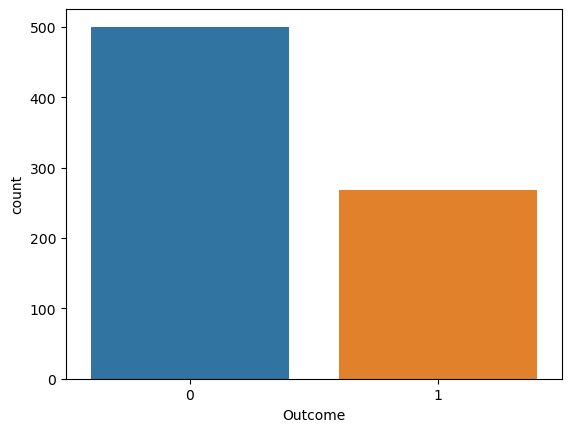

In [12]:
sns.countplot(x="Outcome",data=diabetes)

<Axes: xlabel='Outcome', ylabel='Glucose'>

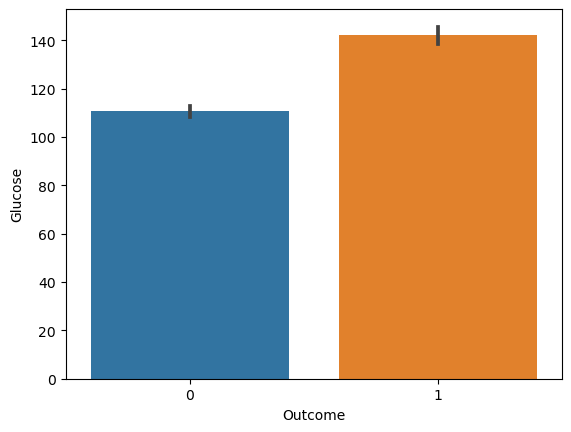

In [13]:
sns.barplot(x='Outcome',y='Glucose',data=diabetes)

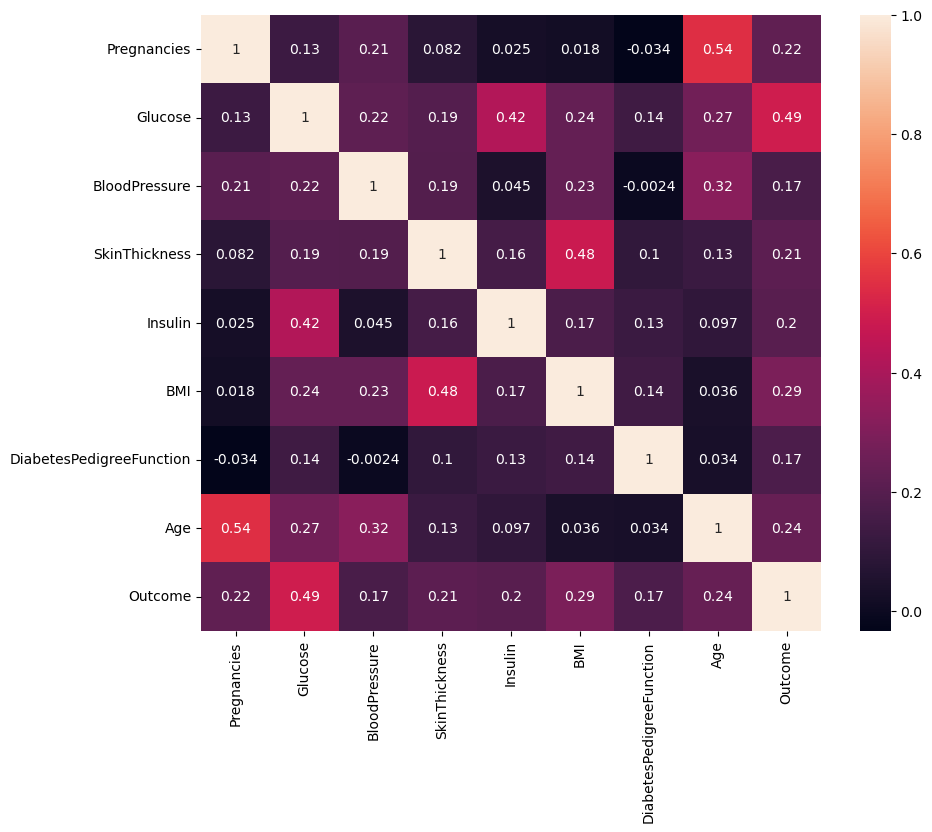

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(diabetes.corr(),annot=True)
plt.show()

In [15]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
x = diabetes.iloc[:,0:8]
x.shape
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [17]:
y=diabetes['Outcome']
y.shape

(768,)

Feature_selection with ExtraTreeClassifier

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [19]:
col=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','Age','SkinThickness','DiabetesPedigreeFunction']
feature_imp = pd.Series(model.feature_importances_,index=col)
feature_imp

Pregnancies                 0.104008
Glucose                     0.251040
BloodPressure               0.094943
Insulin                     0.084653
BMI                         0.081770
Age                         0.136207
SkinThickness               0.114240
DiabetesPedigreeFunction    0.133139
dtype: float64

In [20]:
X=diabetes.drop(columns={'BloodPressure','Insulin','DiabetesPedigreeFunction','Outcome'},axis=1)

In [21]:
X.shape,print(X)

     Pregnancies  Glucose  SkinThickness   BMI  Age
0              6    148.0           35.0  33.6   50
1              1     85.0           29.0  26.6   31
2              8    183.0           29.0  23.3   32
3              1     89.0           23.0  28.1   21
4              0    137.0           35.0  43.1   33
..           ...      ...            ...   ...  ...
763           10    101.0           48.0  32.9   63
764            2    122.0           27.0  36.8   27
765            5    121.0           23.0  26.2   30
766            1    126.0           29.0  30.1   47
767            1     93.0           31.0  30.4   23

[768 rows x 5 columns]


((768, 5), None)

Spliting the data 

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [23]:
print("The shape of x_train",x_train.shape)
print("The shape of y_train",y_train.shape)
print("The shape of x_test",x_test.shape)
print("The shape of y_test",y_test.shape)

The shape of x_train (614, 5)
The shape of y_train (614,)
The shape of x_test (154, 5)
The shape of y_test (154,)


Scaling the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [25]:
xtrain=scaler.transform(x_train)
xtest=scaler.transform(x_test)

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model=LogisticRegression()

In [28]:
model.fit(xtrain,y_train)

LogisticRegression()

In [29]:
le_pred =model.predict(xtest)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
lr_acc=accuracy_score(y_test,le_pred)

In [32]:
print("Logistic Regression accuracy:" ,round(lr_acc*100))

Logistic Regression accuracy: 80


Visualization of logistic Regression

In [33]:
y_prob = model.predict_proba(x_test)

In [34]:
input_labels = ['Glucose']

output_labels=['Outcome']

In [35]:
x_test_view = x_test[input_labels].values.squeeze()

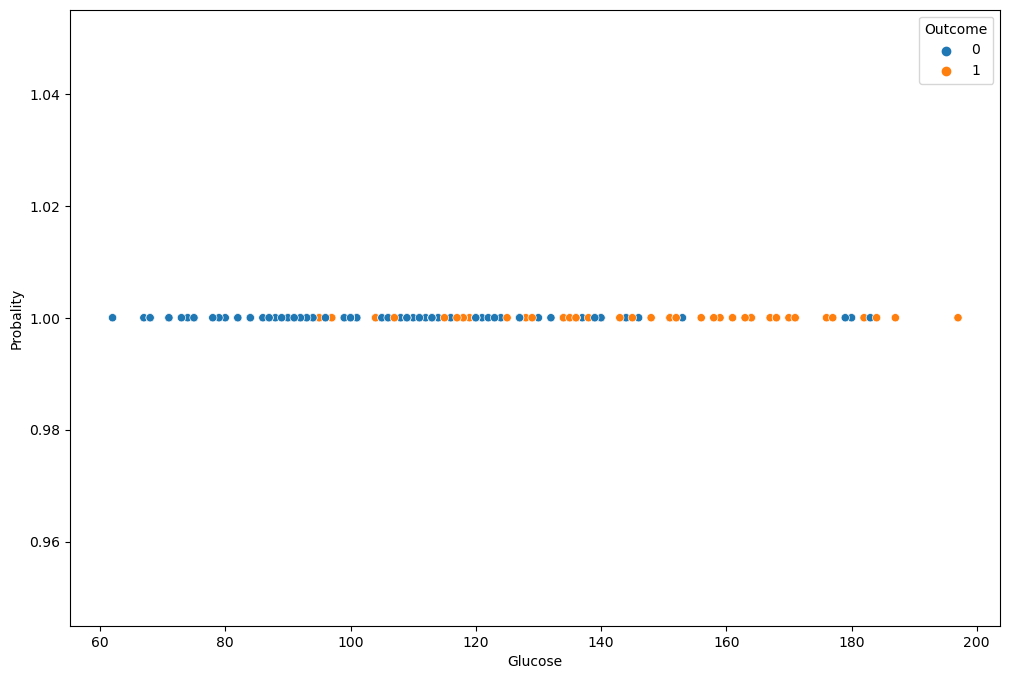

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=x_test_view,y=y_prob[:,1],hue=y_test)
plt.xlabel('Glucose')
plt.ylabel('Probality')
plt.show()

The above scatterplot show the dependant diabetes on glucose level .